In [1]:
import pandas as pd
import numpy as np

In [6]:
#pip install yahoo_fin

In [5]:
from datetime import date
from matplotlib import pyplot as plt


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from yahoo_fin.stock_info import get_data

In [7]:
amzn_weekly= get_data("amzn", start_date="12/04/2000", end_date="07/04/2022", index_as_date = True, interval="1wk")
amzn_weekly

,open,high,low,close,adjclose,volume,ticker
2000-12-04,1.259375,1.381250,1.006250,1.171875,1.171875,1013370000,AMZN
2000-12-11,1.143750,1.375000,1.087500,1.143750,1.143750,804546000,AMZN
2000-12-18,1.037500,1.059375,0.743750,0.778125,0.778125,1390856000,AMZN
2000-12-25,0.815625,0.925000,0.750000,0.778125,0.778125,678338000,AMZN
2001-01-01,0.790625,0.893750,0.678125,0.728125,0.728125,866064000,AMZN
...,...,...,...,...,...,...,...
2022-05-30,116.279999,125.610001,115.675003,122.349998,122.349998,470326000,AMZN
2022-06-06,125.250000,128.990005,109.050003,109.650002,109.650002,439648100,AMZN
2022-06-13,104.190002,109.059998,101.430000,106.220001,106.220001,435976000,AMZN
2022-06-20,108.199997,116.709999,103.559998,116.459999,116.459999,265154200,AMZN


In [8]:
amzn_weekly.index.name = 'Date'

In [9]:
df= pd.DataFrame(amzn_weekly)
df.head()

,open,high,low,close,adjclose,volume,ticker
Date,,,,,,,
2000-12-04,1.259375,1.381250,1.006250,1.171875,1.171875,1013370000,AMZN
2000-12-11,1.143750,1.375000,1.087500,1.143750,1.143750,804546000,AMZN
2000-12-18,1.037500,1.059375,0.743750,0.778125,0.778125,1390856000,AMZN
2000-12-25,0.815625,0.925000,0.750000,0.778125,0.778125,678338000,AMZN
2001-01-01,0.790625,0.893750,0.678125,0.728125,0.728125,866064000,AMZN


In [10]:
df.isna().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

In [12]:
df.describe()

,open,high,low,close,adjclose,volume
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1.126000e+03
mean,33.684492,34.781774,32.712622,33.786523,33.786523,5.961539e+08
std,48.900815,50.486683,47.466602,48.957863,48.957863,3.761248e+08
min,0.295500,0.383000,0.275500,0.298500,0.298500,1.166720e+08
25%,2.210125,2.314875,2.112875,2.221875,2.221875,3.459635e+08
50%,9.561000,9.844750,9.257750,9.639500,9.639500,5.123050e+08
75%,41.762500,42.335375,41.335752,41.945001,41.945001,7.336650e+08
max,187.199997,188.654007,178.522995,185.966995,185.966995,4.884366e+09


In [13]:
df = df.sort_values('Date')

Text(0.5, 1.0, ' AMZN Stock Plot for Overall Period')

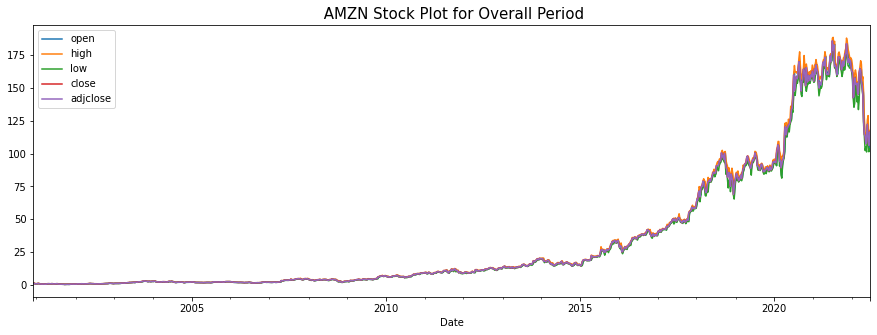

In [14]:
df[['open', 'high','low','close','adjclose']].plot(figsize=(15,5))
plt.title(" AMZN Stock Plot for Overall Period", fontsize=15)